In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [5]:
df = pd.read_csv("/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descriptive Statistics

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualization

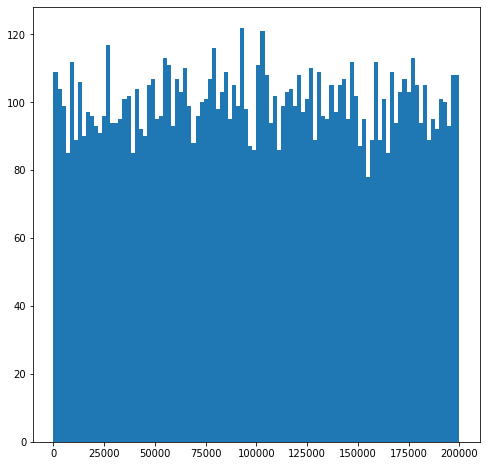

In [8]:
plt.figure(figsize=(8,8))
plt.hist(df.EstimatedSalary,bins=int(np.sqrt(len(list(df.HasCrCard)))))
plt.show()

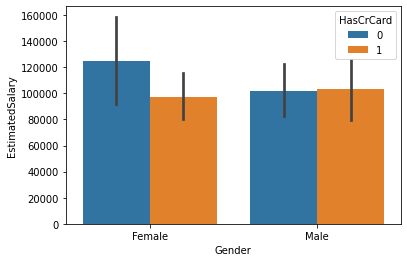

In [9]:
sns.barplot(y=  "EstimatedSalary",x="Gender",hue="HasCrCard",data=df[:100])

In [10]:
sns.scatter(x = "EstimatedSalary",y = "Balance",hue="Gender",data=df[:100])

AttributeError: ignored

## Handling Missing Value

In [11]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
num = df.select_dtypes(include=["float64","int64"])
num.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


# Outlier Remover

In [16]:
df.size

140000

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.size

107478

# Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
num = num.drop("Exited",axis=1)
df[num.columns] = StandardScaler().fit_transform(df[num.columns])


## OneHotEncoding

In [20]:
cat = df.select_dtypes(exclude=["int64","float64"])
cat.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [21]:
mod = df.drop(["Surname","CustomerId"],axis=1)
df  = pd.get_dummies(drop_first=True,data=mod)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,-1.735323,-0.455004,0.599817,-1.403186,0.174070,-1.072759,-1.553061,0.923583,0.221181,0,0,1,0
3,-1.734632,0.496133,0.350214,-1.403186,-1.159714,0.892771,-1.553061,-1.082740,-0.104937,0,0,0,0
4,-1.734286,2.074392,0.849420,-1.055481,0.837764,-1.072759,0.643890,0.923583,-0.361820,0,0,1,0
6,-1.733595,1.781735,1.723029,0.683046,-1.159714,0.892771,0.643890,0.923583,-1.564488,0,0,0,1
8,-1.732904,-1.573373,0.974221,-0.360070,1.100999,0.892771,-1.553061,0.923583,-0.434020,0,0,0,1


# Splitting The Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited",axis=1),df["Exited"], test_size=0.33, random_state=42)

In [24]:
X_train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5699,0.234150,0.339352,-0.148991,0.335341,1.002652,-1.072759,0.643890,0.923583,-0.220065,0,0,1
9362,1.500240,0.339352,-0.148991,-0.707775,1.023467,-1.072759,0.643890,0.923583,-1.090516,0,0,1
7166,0.741208,-0.350483,0.475016,1.030751,-1.159714,0.892771,0.643890,-1.082740,-0.342299,0,1,0
6009,0.341299,-1.322524,-0.398594,-0.012365,-1.159714,0.892771,0.643890,-1.082740,1.065572,0,1,1
1470,-1.227574,-0.873086,-0.648196,-1.403186,-0.179488,0.892771,0.643890,0.923583,-0.663047,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6833,0.626109,0.245283,-0.273792,1.726162,0.192161,-1.072759,-1.553061,-1.082740,0.808182,0,0,0
7039,0.697311,-1.343428,2.971042,-1.403186,1.448630,-1.072759,-1.553061,0.923583,-0.745551,1,0,1
1127,-1.346129,-1.071675,1.099022,-0.707775,1.127783,0.892771,0.643890,0.923583,-0.060021,1,0,0
9911,1.689998,0.318448,0.974221,-0.707775,0.674980,-1.072759,-1.553061,-1.082740,-1.325708,0,0,1
